# App

## Package

In [41]:
from typing import Tuple, Union

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle

from utils import get_data, get_metrics
from classic_CV import create_result_classic
from

## Import data

In [32]:
data = get_data(path='../data/HRF/')

In [34]:
MLdata = pd.read_csv('../data/for_CML/test_data.csv')

In [35]:
pd.unique(MLdata.id)

array([0, 1, 2, 3, 4], dtype=int64)

## Import models

In [40]:
classic_model = pickle.load(open('../trained/RFC_model','rb'))

# Main

In [45]:
def final_function(model: str='classic_CV', index: int=0) -> Union[Tuple[None, None], Tuple[np.ndarray, Tuple[float, float, float]]]:
    models = ['classic_CV', 'classic_ML', 'UNet']
    dim = (876, 584)
    if model in models:
        if model == 'classic_CV':
            result = create_result_classic(data['original'][index][:, :, 1], data['mask'][index])
            metrics = get_metrics(result, data['labeled'][index])
        elif model == 'classic_ML':
            if index not in [0, 1, 2, 3, 4]:
                print('Wrong index. Choose between 0 and 4!')
                return None, None
            input = MLdata.loc[MLdata.index == index]
            result = classic_model.predict(input)
            metrics = get_metrics(result, cv2.resize(data['labeled'][index], dim, interpolation = cv2.INTER_AREA))
    else:
        print('Wrong model')
        return None, None
    return result, metrics

### Classic test

metric = (0.9150950772502658, 0.9817846341666435, 0.9138994525679067)


KeyboardInterrupt: 

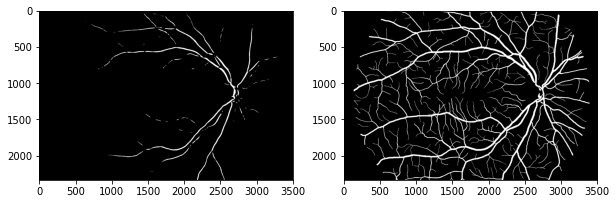

In [42]:
metrics_summary = np.array([0.0, 0.0, 0.0])
num = 5
plt.figure(figsize=(5*2, 5*num))

for index in range(num):
    result, metric = final_function(index=index)
    print(f'{metric = }')
    metrics_summary += metric
    plt.subplot(num, 2, index*2+1)
    plt.imshow(result, cmap='gray')
    plt.subplot(num, 2, index*2+2)
    plt.imshow(data['labeled'][index], cmap='gray')
    metrics_summary = metrics_summary/5
print(f'accuracy:{metrics_summary[0]}, sensitivity{metrics_summary[1]}, specificity{metrics_summary[2]}')

## ML test

In [46]:
result, metric = final_function(model='classic_ML', index=0)

c:\users\adam\pp\iwm\tomograph\venv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
- id
- label
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 33 features, but RandomForestClassifier is expecting 30 features as input.

In [26]:
metrics_summary = np.array([0.0, 0.0, 0.0])
num = 5
plt.figure(figsize=(5*2, 5*num))

for index in range(num):
    result, metric = final_function(index=index)
    print(f'{metric = }')
    metrics_summary += metric
    plt.subplot(num, 2, index*2+1)
    plt.imshow(result, cmap='gray')
    plt.subplot(num, 2, index*2+2)
    plt.imshow(data['labeled'][index], cmap='gray')
    metrics_summary = metrics_summary/5
print(f'accuracy:{metrics_summary[0]}, sensitivity{metrics_summary[1]}, specificity{metrics_summary[2]}')

1 2
3 4
5 6
7 8
9 10
